In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
df=pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [6]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
df['dropoff_longitude'].fillna(df['dropoff_longitude'].mean(),inplace=True)
df['dropoff_latitude'].fillna(df['dropoff_latitude'].mean(),inplace=True)

In [9]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [10]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [12]:
df['year']=df['pickup_datetime'].dt.year
df['month']=df['pickup_datetime'].dt.month
df['dayofweek']=df['pickup_datetime'].dt.dayofweek
df['day']=df['pickup_datetime'].dt.day
df['hour']=df['pickup_datetime'].dt.hour

In [13]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,dayofweek,day,hour
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,7,19
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,17,20
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,24,21
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,26,8
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,28,17


In [16]:
df.drop(['Unnamed: 0',	'key','pickup_datetime'],axis=1,inplace=True,errors='ignore')
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,dayofweek,day,hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,7,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,17,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,24,21
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,26,8
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,28,17
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,28,10
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,14,1
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,29,0
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,20,14


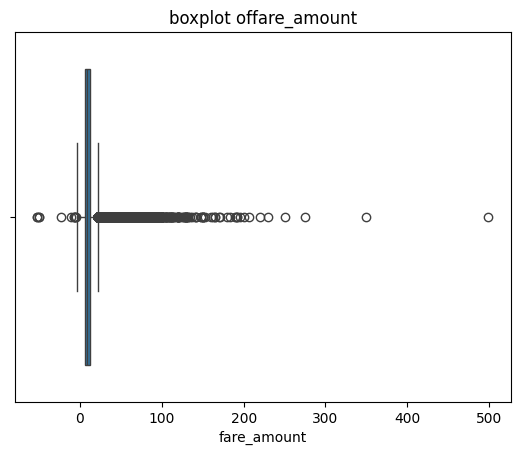

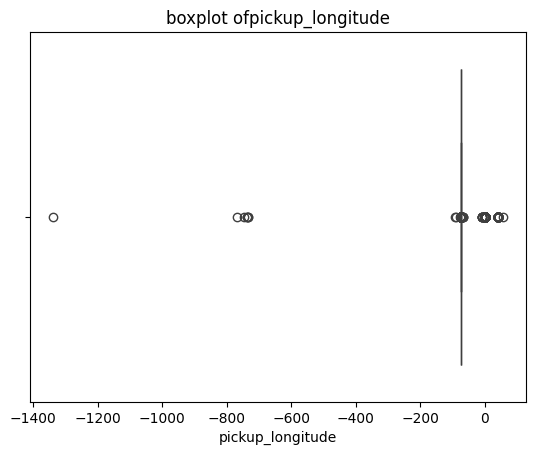

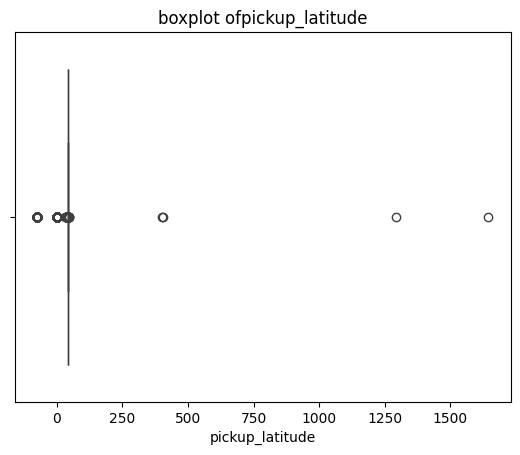

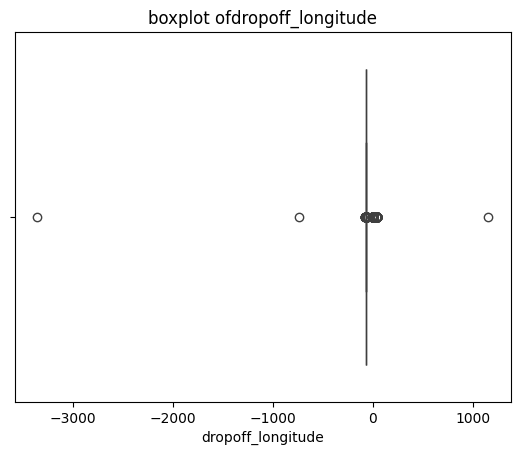

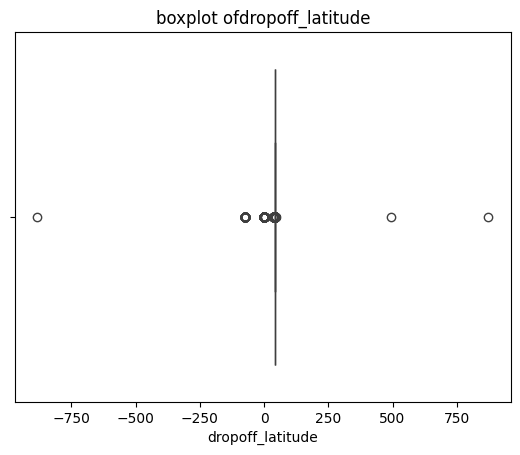

In [18]:
nc=['fare_amount',	'pickup_longitude',	'pickup_latitude',	'dropoff_longitude',	'dropoff_latitude']
for col in nc:
    sns.boxplot(x=df[col])
    plt.title(f'boxplot of{col}')
    plt.show()

In [26]:
for col in nc:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr

    df=df[(df[col]>=lb) & (df[col]<=ub)]
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,dayofweek,day,hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,7,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,17,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,24,21
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,26,8
5,4.9,-73.969019,40.755910,-73.969019,40.755910,1,2011,2,5,12,2
...,...,...,...,...,...,...,...,...,...,...,...
199993,9.5,-73.987798,40.721210,-73.980960,40.744388,1,2012,9,5,29,19
199994,12.0,-73.983070,40.760770,-73.972972,40.754177,1,2014,1,4,31,14
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,28,10
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,14,1


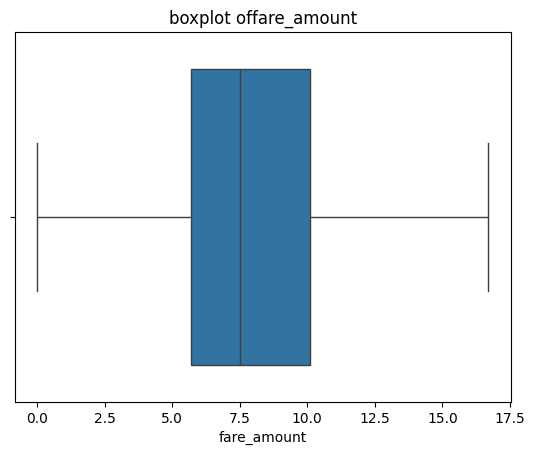

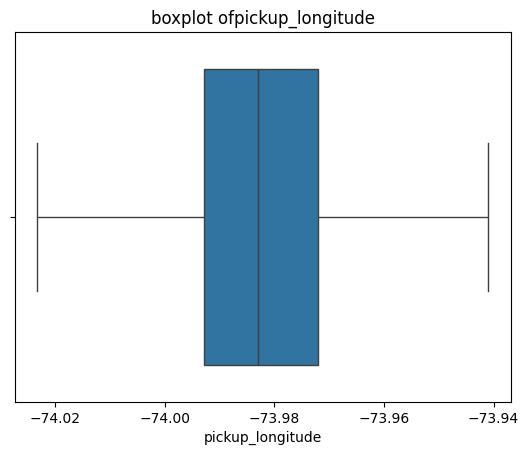

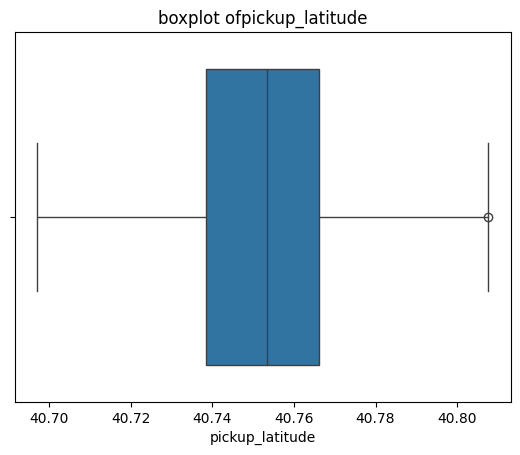

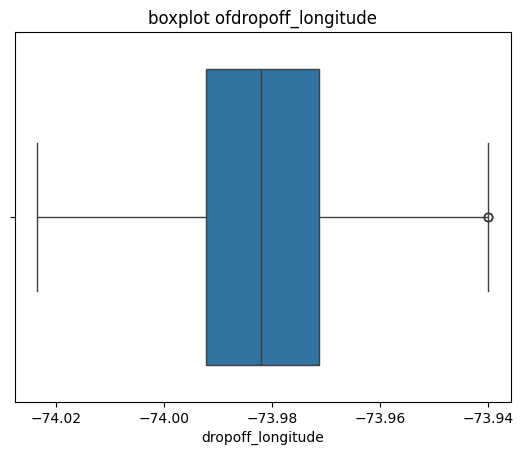

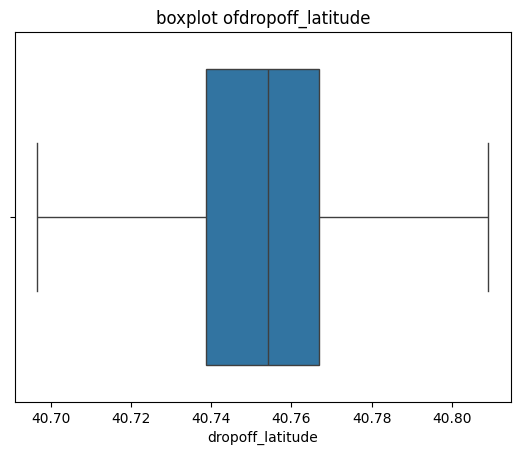

In [27]:
for col in nc:
    sns.boxplot(x=df[col])
    plt.title(f'boxplot of{col}')
    plt.show()

In [28]:
corr=df.corr()
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,dayofweek,day,hour
fare_amount,1.000000,-0.056368,-0.067013,-0.027521,-0.064071,0.019566,0.133141,0.028052,0.008919,0.004746,0.016960
pickup_longitude,-0.056368,1.000000,0.692890,0.462505,0.405107,-0.014559,-0.001423,-0.002452,-0.037934,-0.004970,0.019330
pickup_latitude,-0.067013,0.692890,1.000000,0.389094,0.562568,-0.013063,0.002639,0.001233,-0.053411,-0.003092,0.035553
dropoff_longitude,-0.027521,0.462505,0.389094,1.000000,0.664919,-0.015128,0.003384,-0.001478,-0.033543,-0.010202,0.005394
dropoff_latitude,-0.064071,0.405107,0.562568,0.664919,1.000000,-0.010918,0.005316,0.001081,-0.041814,-0.008070,0.025708
passenger_count,0.019566,-0.014559,-0.013063,-0.015128,-0.010918,1.000000,0.004100,0.007937,0.038536,0.001652,0.015690
year,0.133141,-0.001423,0.002639,0.003384,0.005316,0.004100,1.000000,-0.115307,0.006308,-0.012029,0.004950
month,0.028052,-0.002452,0.001233,-0.001478,0.001081,0.007937,-0.115307,1.000000,-0.011277,-0.016631,-0.003900
dayofweek,0.008919,-0.037934,-0.053411,-0.033543,-0.041814,0.038536,0.006308,-0.011277,1.000000,0.005419,-0.080346
day,0.004746,-0.004970,-0.003092,-0.010202,-0.008070,0.001652,-0.012029,-0.016631,0.005419,1.000000,0.003435


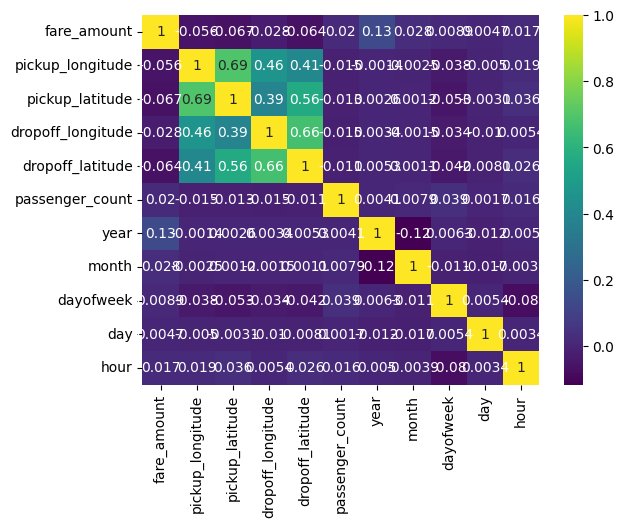

In [29]:
sns.heatmap(corr,annot=True,cmap='viridis')
plt.show()

In [34]:

from math import *
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    distance = []
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        distance.append(c)
    return distance

In [36]:
df["distance_km"] = distance_transform(df["pickup_longitude"].to_numpy(), df["pickup_latitude"].to_numpy(), 
                                      df["dropoff_longitude"].to_numpy(), df["dropoff_latitude"].to_numpy())


In [37]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,dayofweek,day,hour,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,7,19,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,17,20,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,24,21,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,26,8,1.661683
5,4.9,-73.969019,40.755910,-73.969019,40.755910,1,2011,2,5,12,2,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
199993,9.5,-73.987798,40.721210,-73.980960,40.744388,1,2012,9,5,29,19,2.640893
199994,12.0,-73.983070,40.760770,-73.972972,40.754177,1,2014,1,4,31,14,1.122878
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,28,10,0.112210
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,14,1,1.875050


In [49]:
x=df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count',	'year',	'month','dayofweek'	,'day','hour','distance_km']]
y=df['fare_amount']

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=9)

In [54]:
from sklearn.linear_model import LinearRegression 
regression=LinearRegression()
regression.fit(x_train,y_train)
y_pred=regression.predict(x_test)

In [55]:
y_pred

array([ 6.34502681, 10.72610299,  7.70806707, ...,  9.92791038,
       10.68965714,  6.55283546])

In [58]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
r2

0.6424654018255223

In [59]:
mse=mean_squared_error(y_test,y_pred)
mse

3.522141746759731

In [64]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=10)
rf.fit(x_train,y_train)
r_pred=rf.predict(x_test)

In [65]:
r_pred

array([ 5.93, 12.55,  8.76, ..., 13.  , 11.15,  5.6 ])

In [66]:
r2s=r2_score(y_test,r_pred)
r2s

0.703114716405236